### Sumário  

1. [Importando Bibliotecas](#importando-bibliotecas)  
    - 1.1 [Carregamento dos Dados](#carregamento-dos-dados)  
    - 1.2 [Exibição das Primeiras Linhas](#exibicao-das-primeiras-linhas)  
2. [Análise Estatística Descritiva](#analise-estatistica-descritiva)  
    - 2.1 [Cálculo das Médias](#calculo-das-medias)  
    - 2.2 [Análise de Correlação](#analise-de-correlacao)  
    - 2.3 [Análise dos Resultados](#interpretacao-dos-resultados)  
3. [Análise Estatística Detalhada](#analise-estatistica-detalhada)  
    - 3.1 [Desvio Padrão, Mínimo, Máximo e Quartis](#desvio-padrao-minimo-maximo-e-quartis)  
    - 3.2 [Skewness (Assimetria)](#skewness-assimetria)  
    - 3.3 [Kurtosis (Curtose)](#kurtosis-curtose)  
    - 3.4 [Análise dos Resultados](#interpretacao-dos-resultados-2)  
4. [Visualização dos Dados](#visualizacao-dos-dados)  
    - 4.1 [Histograma](#histograma)  
    - 4.2 [Gráfico de Dispersão](#grafico-de-dispersao)  
    - 4.3 [Boxplot](#boxplot)  
    - 4.4 [Análise dos Resultados](#interpretacao-dos-resultados-3)  
5. [Análise de Eficiência e Produtividade](#analise-de-eficiencia-e-produtividade)  
    - 5.1 [Cálculo da Eficiência](#calculo-da-eficiencia)  
    - 5.2 [Análise dos Resultados](#interpretacao-dos-resultados-4)  
6. [Comparação de Eficiência entre Produtos](#comparacao-de-eficiencia-entre-produtos)  
    - 6.1 [Gráfico de Eficiência por Produto](#grafico-de-eficiencia-por-produto)  
    - 6.2 [Análise dos Resultados](#interpretacao-dos-resultados-5)  
7. [Insights Operacionais](#insights-operacionais)  
8. [Oportunidades de Melhoria](#oportunidades-de-melhoria)  
9. [Conclusão](#conclusao)


#### 1. Importação das Bibliotecas:
Neste passo, importamos as bibliotecas necessárias para a análise de dados.

##### 1.1 Carregamento dos Dados
O arquivo CSV gerado na etapa anterior é carregado no `df` (DataFrame do Pandas). O `df` é uma estrutura de dados bidimensional que permite fácil manipulação de dados em Python. 

`OBS:` Certifique-se de que o arquivo CSV está no local correto: O código que carrega os dados do CSV pode  falhar devido ao caminho do arquivo estar incorreto. Verifique se o arquivo '../data/dados_producao.csv' está no diretório esperado.

##### 1.2 Exibição das Primeiras Linhas
O método `df.head()` exibe as primeiras 5 linhas do DataFrame para termos uma ideia do formato dos dados. Isso nos ajuda a entender rapidamente a estrutura do arquivo e verificar se os dados foram carregados corretamente.


In [1]:
# Importando as bibliotecas necessárias
import subprocess
import sys

# Lista das bibliotecas necessárias
required_libraries = [
    'pandas', 
    'numpy', 
    'matplotlib', 
    'seaborn', 
    'scipy'
]

# Função para instalar as bibliotecas ausentes
def install_libraries():
    for library in required_libraries:
        try:
            __import__(library)  # Tenta importar a biblioteca
            print(f"✅ {library} já está instalado.")
        except ImportError:
            print(f"⚠️ {library} não encontrado. Instalando...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", library])
            print(f"✅ {library} instalado com sucesso!")

# Executa a verificação e instalação das bibliotecas
install_libraries()

# Importando novamente as bibliotecas, pois podem ter sido instaladas durante a execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carregando os dados do arquivo CSV
try:
    df = pd.read_csv(r'I:\Servidor\Portfolio-Data-Analysis-1\data\dados_producao.csv')
    print("📂 Dados carregados com sucesso!")
except FileNotFoundError:
    print("❌ Arquivo não encontrado! Verifique o caminho e tente novamente.")
except Exception as e:
    print(f"❌ Erro ao carregar o arquivo: {e}")

# Verificando se o DataFrame foi carregado antes de tentar exibir
if 'df' in locals():
    print("\n🔍 Visualizando as primeiras linhas do dataset:")
    display(df.head())  # Pode ser substituído por print(df.head()) se não for usar Jupyter

    # Analisando estatísticas descritivas dos dados
    print("\n📊 Estatísticas Descritivas:")
    display(df.describe())  # Pode ser substituído por print(df.describe()) se não for usar Jupyter
else:
    print("❌ DataFrame não carregado. Verifique o arquivo CSV.")

# Criando uma função para resumo estatístico aprimorado
def resumo_estatistico(df, colunas):
    """
    Calcula estatísticas descritivas das colunas selecionadas, incluindo:
    - Média
    - Desvio Padrão
    - Valor Mínimo
    - Quartis (25%, 50% - Mediana, 75%)
    - Valor Máximo
    - Moda (valor mais frequente)

    Parâmetros:
    df (DataFrame): O conjunto de dados
    colunas (list): Lista de colunas para análise

    Retorna:
    DataFrame formatado com estatísticas principais.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("O parâmetro 'df' deve ser um DataFrame do Pandas.")

    if not all(col in df.columns for col in colunas):
        raise ValueError("Uma ou mais colunas não foram encontradas no DataFrame.")

    resumo = df[colunas].describe().T  # Transpor para facilitar leitura
    resumo["mediana"] = df[colunas].median()
    resumo["moda"] = df[colunas].mode().iloc[0]  # Pega a primeira moda se houver múltiplos valores

    print("\n📊 Resumo Estatístico:\n")
    return resumo

# Chamando a função para analisar os dados
if 'df' in locals():
    resumo_estatistico(df, ['Tempo_Producao', 'Tempo_Setup', 'Quantidade_Produzida'])


✅ pandas já está instalado.
✅ numpy já está instalado.
✅ matplotlib já está instalado.
✅ seaborn já está instalado.
✅ scipy já está instalado.
📂 Dados carregados com sucesso!

🔍 Visualizando as primeiras linhas do dataset:


,ID_Produto,Data_Producao,Tempo_Producao,Tempo_Setup,Quantidade_Produzida
0,P0001,2024-01-25,42,50,16
1,P0002,2024-01-22,149,21,40
2,P0003,2024-01-18,182,23,100
3,P0004,2024-01-23,66,16,83
4,P0005,2024-01-24,105,10,89



📊 Estatísticas Descritivas:


,Tempo_Producao,Tempo_Setup,Quantidade_Produzida
count,10000.000000,10000.000000,10000.000000
mean,135.185600,35.096400,55.295700
std,60.873309,14.761677,26.328972
min,30.000000,10.000000,10.000000
25%,83.000000,22.000000,32.000000
50%,136.000000,35.000000,55.000000
75%,187.000000,48.000000,79.000000
max,240.000000,60.000000,100.000000



📊 Resumo Estatístico:



### 2. Análise Estatística Descritiva

A análise estatística descritiva tem como objetivo resumir os dados e calcular medidas centrais, como média, mediana, e desvio padrão, para entender melhor o comportamento dos tempos de produção, tempo de setup e a quantidade produzida.

---

#### 2.1 Cálculo das Médias

O primeiro passo foi calcular a média de três variáveis importantes:

1. **Tempo médio de produção**: A média do tempo que foi gasto para produzir os itens.
2. **Tempo médio de setup**: A média do tempo necessário para configurar a produção.
3. **Quantidade média produzida**: A média da quantidade de itens produzidos.

In [2]:

# Analisando o tempo médio de produção
media_tempo_producao = df['Tempo_Producao'].mean()
print(f"Tempo médio de produção: {media_tempo_producao:.2f} minutos")

# Analisando o tempo médio de setup
media_tempo_setup = df['Tempo_Setup'].mean()
print(f"Tempo médio de setup: {media_tempo_setup:.2f} minutos")

# Analisando a quantidade média produzida
media_quantidade_produzida = df['Quantidade_Produzida'].mean()
print(f"Quantidade média produzida: {media_quantidade_produzida:.2f} unidades")




Tempo médio de produção: 135.19 minutos
Tempo médio de setup: 35.10 minutos
Quantidade média produzida: 55.30 unidades


#### 2.2 Análise de Correlação

Além de calcular as médias, também foi realizada uma análise de correlação entre o tempo de produção e o tempo de setup. Isso ajuda a entender se existe uma relação entre essas duas variáveis.


In [3]:
# Comparando o tempo de produção com o tempo de setup (por exemplo, correlação)
correlacao = df[['Tempo_Producao', 'Tempo_Setup']].corr()
print("Correlação entre tempo de produção e tempo de setup:")
print(correlacao)

Correlação entre tempo de produção e tempo de setup:
                Tempo_Producao  Tempo_Setup
Tempo_Producao        1.000000    -0.013547
Tempo_Setup          -0.013547     1.000000


#### 2.3 Análise dos Resultados

Após realizar os cálculos das médias e da correlação entre as variáveis, obtemos os seguintes resultados:

##### Tempo médio de produção
O tempo médio de produção foi de **135,19 minutos**. Isso significa que, em média, cada unidade leva cerca de **2 horas e 15 minutos** para ser produzida. Este valor pode variar dependendo do tipo de produto e da linha de produção, mas serve como um bom indicador inicial do tempo necessário para produção. 

##### Tempo médio de setup
O tempo médio de setup foi de **35,10 minutos**. Este valor representa o tempo necessário para ajustar a máquina e a linha de produção antes de iniciar a produção de uma nova unidade ou lote de produtos. O tempo de setup pode incluir ajustes na máquina, troca de ferramentas, calibração, etc. Vale observar que esse valor é significativamente menor que o tempo de produção, o que é comum em muitas indústrias.

##### Quantidade média produzida
A quantidade média produzida foi de **55,30 unidades**. Esse valor indica a média de unidades fabricadas por ciclo de produção. Assim como os outros valores, esse número pode variar dependendo do tipo de produto e da demanda da fábrica.

##### Correlação entre tempo de produção e tempo de setup
A correlação entre o **tempo de produção** e o **tempo de setup** foi de **-0.013547**. Esse valor indica uma correlação muito fraca e negativa. Em termos simples, isso significa que **não há uma relação direta** entre o tempo de produção e o tempo de setup. Ou seja, mudanças no tempo de setup não afetam significativamente o tempo de produção. Esse resultado é interessante, pois sugere que, no cenário analisado, o tempo de setup parece ser **relativamente independente** do tempo de produção.

---

### 3. Análise Estatística Detalhada

Vamos começar com uma análise estatística mais profunda dos dados, incluindo:

- **Desvio Padrão**: Para ver a dispersão dos tempos de produção e setup.
- **Mínimo, Máximo e Quartis**: Para entender melhor a distribuição dos dados (ex: quem são os valores mais altos ou mais baixos e onde estão os pontos médios).
- **Skewness (Assimetria)** e **Kurtosis (Curtose)**: Para ver como os dados se distribuem. Se a distribuição é assimétrica ou tem picos mais altos.

---

### 3.1 **df.describe()**:
O Pandas tem um método chamado `describe()` que gera uma série de estatísticas básicas para as colunas numéricas do DataFrame, como:
- Média
- Desvio padrão
- Mínimo e máximo
- Quartis (25%, 50%, 75%)

Este método oferece uma visão geral útil dos dados e ajuda a identificar valores extremos, pontos médios e a dispersão dos dados.

In [4]:

# Criando uma função para resumo estatístico
def resumo_estatistico(df, colunas):
    """
    Calcula estatísticas descritivas das colunas selecionadas.
    """
    return df[colunas].describe()

# Chamando a função para analisar os dados
resumo_estatistico(df, ['Tempo_Producao', 'Tempo_Setup', 'Quantidade_Produzida'])


,Tempo_Producao,Tempo_Setup,Quantidade_Produzida
count,10000.000000,10000.000000,10000.000000
mean,135.185600,35.096400,55.295700
std,60.873309,14.761677,26.328972
min,30.000000,10.000000,10.000000
25%,83.000000,22.000000,32.000000
50%,136.000000,35.000000,55.000000
75%,187.000000,48.000000,79.000000
max,240.000000,60.000000,100.000000



#### 3.2 **Skewness (Assimetria)**:
A assimetria mede a simetria da distribuição dos dados. 
- Se o valor for **positivo**, a cauda da distribuição está para a **direita** (distribuição assimétrica positiva).
- Se o valor for **negativo**, a cauda está para a **esquerda** (distribuição assimétrica negativa).
- Um valor de **zero** indica que a distribuição é **simétrica**.

In [5]:
# Skewness (assimetria) do Tempo de Produção e Tempo de Setup
skew_producao = df['Tempo_Producao'].skew()
skew_setup = df['Tempo_Setup'].skew()

print(f"Skewness do Tempo de Produção: {skew_producao:.2f}")
print(f"Skewness do Tempo de Setup: {skew_setup:.2f}")


Skewness do Tempo de Produção: -0.01
Skewness do Tempo de Setup: -0.01


#### 3.3 **Kurtosis (Curtose)**:
A curtose mede o "peso das caudas" da distribuição.
- Se o valor de **kurtosis for maior que 3**, indica que as caudas da distribuição são **mais pesadas**, ou seja, os dados possuem **picos mais altos** e mais **extremos** do que uma distribuição normal.
- Um valor de **kurtosis igual a 3** é característico de uma distribuição normal.




In [6]:
# Kurtosis (curtose) do Tempo de Produção e Tempo de Setup
kurt_producao = df['Tempo_Producao'].kurtosis()
kurt_setup = df['Tempo_Setup'].kurtosis()

print(f"Kurtosis do Tempo de Produção: {kurt_producao:.2f}")
print(f"Kurtosis do Tempo de Setup: {kurt_setup:.2f}")


Kurtosis do Tempo de Produção: -1.19
Kurtosis do Tempo de Setup: -1.21


#### 3.4 **Análise dos Resultados**

A análise estatística detalhada fornece uma visão profunda sobre a distribuição dos dados, incluindo dispersão, assimetria e caudas. A seguir, apresentamos a interpretação dos principais resultados obtidos:

##### **Tempo de Produção:**

- **Média**: 135.19 minutos.  
  Em média, cada ciclo de produção leva 135.19 minutos. Esse valor nos dá uma boa noção do tempo médio necessário para produzir uma unidade ou lote de produtos. Esse tempo pode variar dependendo da complexidade do processo de produção.

- **Desvio Padrão**: 60.87 minutos.  
  O desvio padrão relativamente alto indica uma considerável variação nos tempos de produção. Isso pode ser devido a variações no tipo de produto ou na eficiência da linha de produção, o que pode justificar a análise de oportunidades para redução da variabilidade.

- **Mínimo**: 30 minutos.  
  O menor tempo registrado foi de 30 minutos, o que sugere que, em alguns casos, a produção pode ser mais rápida, possivelmente para itens mais simples ou quando as condições de produção são ideais.

- **Máximo**: 240 minutos.  
  O maior tempo de produção registrado foi de 240 minutos, indicando que em algumas situações a produção pode ser significativamente mais demorada, possivelmente devido a falhas na linha, complexidade do produto ou necessidade de ajustes durante o processo.

- **Quartis (25%, 50%, 75%)**:  
  - 25% dos dados têm um tempo de produção inferior a 83 minutos, sugerindo que há uma parte da produção que ocorre de forma mais eficiente.
  - 50% dos dados (mediana) estão abaixo de 136 minutos, indicando que a maioria dos processos de produção se concentram em torno desse valor.
  - 75% dos dados têm um tempo de produção inferior a 187 minutos, o que nos mostra que a maior parte dos tempos de produção fica em um intervalo mais baixo, mas ainda dentro de uma variação considerável.

##### **Tempo de Setup:**

- **Média**: 35.10 minutos.  
  O tempo médio de setup de 35.10 minutos é relativamente baixo, o que é positivo, pois reduz o tempo ocioso entre a produção de lotes ou produtos.

- **Desvio Padrão**: 14.76 minutos.  
  O desvio padrão mais baixo do que o tempo de produção indica que os tempos de setup são mais consistentes. Isso é benéfico para otimizar o processo, já que configurações rápidas e previsíveis ajudam a minimizar ineficiências.

- **Mínimo**: 10 minutos.  
  O menor tempo de setup registrado foi de 10 minutos, mostrando que, em algumas circunstâncias, é possível realizar a troca e preparação para a produção em um tempo muito curto.

- **Máximo**: 60 minutos.  
  O maior tempo de setup foi de 60 minutos, que é um valor mais alto do que o esperado. Esse valor pode indicar casos de setups complexos ou de ajustes em equipamentos mais exigentes.

- **Quartis (25%, 50%, 75%)**:  
  - 25% dos dados têm um tempo de setup inferior a 22 minutos, o que mostra que há uma parte significativa dos processos com setup rápido.
  - 50% dos dados estão abaixo de 35 minutos, indicando que a maior parte das trocas de setup é relativamente rápida.
  - 75% dos dados estão abaixo de 48 minutos, sugerindo que a maioria dos setups está bem dentro de um intervalo razoável para não impactar negativamente o processo de produção.

##### **Quantidade Produzida:**

A **quantidade média produzida** foi de 55.30 unidades, variando de 10 a 100 unidades. Isso indica uma produção moderada por ciclo, com possibilidade de aumento de eficiência ao focar na redução do tempo de setup e produção.

##### **Skewness (Assimetria):**

- O valor de skewness para o Tempo de Produção e Tempo de Setup foi de **-0.01**. Isso indica que as distribuições de ambos os tempos são **simétricas**, com uma leve tendência para a esquerda, mas praticamente equilibradas. Isso significa que não há grande inclinação para os valores mais baixos ou mais altos.

##### **Kurtosis (Curtose):**

- O valor de kurtosis para o Tempo de Produção e Tempo de Setup foi de **-1.19** e **-1.21**, respectivamente. Esses valores são menores que 0, o que significa que os dados têm **caudas mais leves** do que uma distribuição normal. Ou seja, não há picos extremos, indicando uma distribuição mais equilibrada e sem valores outliers significativos.

---

### 4. Visualização dos Dados

A visualização ajudará a entender melhor a distribuição dos dados e pode trazer insights importantes.

Vamos usar:

- **Histograma**: Para visualizar a distribuição do tempo de produção e setup.
- **Gráfico de dispersão (scatter plot)**: Para explorar a relação entre o tempo de produção e o tempo de setup.
- **Boxplot**: Para identificar outliers e ver a distribuição dos dados de maneira compacta.

---

#### 4.1 **Histograma**:
- `plt.figure(figsize=(12, 6))`: Define o tamanho da figura do gráfico. No caso, estamos criando uma figura de 12x6 polegadas.
- `sns.histplot()`: Cria um histograma. O `kde=True` adiciona uma estimativa da função de densidade (curva suave) à distribuição do histograma.
- `bins=20`: Define o número de "barras" no histograma. Aqui, 20 barras são usadas para dividir os dados.
- `plt.tight_layout()`: Ajusta o layout para garantir que os gráficos não se sobreponham.

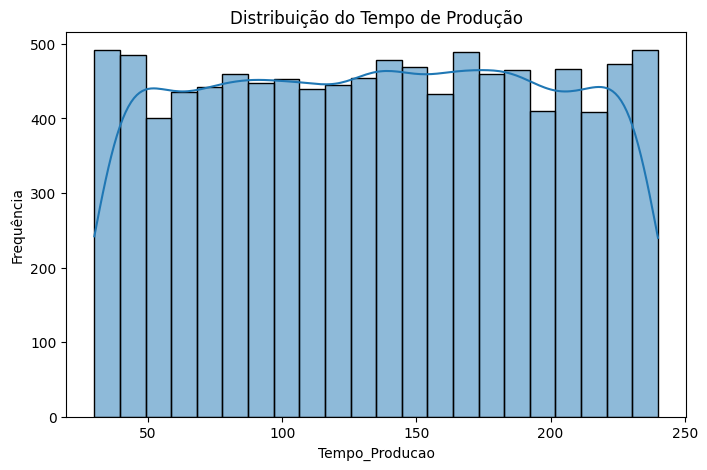

In [7]:

# Criando uma função para gerar histogramas
def plot_histograma(df, coluna, titulo):
    """
    Gera um histograma para visualizar a distribuição da variável.
    """
    plt.figure(figsize=(8,5))
    sns.histplot(df[coluna], kde=True)
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel("Frequência")
    plt.show()

# Gerando histograma para Tempo de Produção
plot_histograma(df, 'Tempo_Producao', "Distribuição do Tempo de Produção")


#### 4.2 **Gráfico de Dispersão (Scatter Plot)**:
- A ideia é visualizar a relação entre o tempo de produção e o tempo de setup, observando possíveis padrões ou correlações.

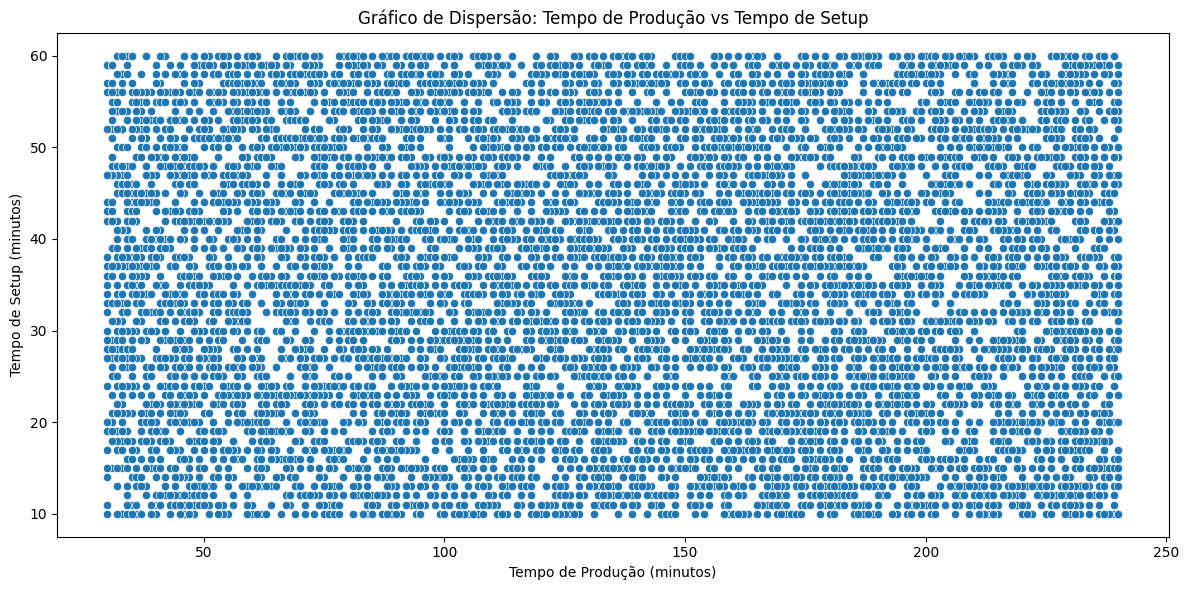

In [8]:
# Gráfico de Dispersão (Tempo de Produção vs Tempo de Setup)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Tempo_Producao'], y=df['Tempo_Setup'])
plt.title('Gráfico de Dispersão: Tempo de Produção vs Tempo de Setup')
plt.xlabel('Tempo de Produção (minutos)')
plt.ylabel('Tempo de Setup (minutos)')
plt.tight_layout()
plt.show()

#### 4.3 **Boxplot**:
- O boxplot ajuda a visualizar a mediana, os quartis, e identificar possíveis outliers nos dados de produção e setup.


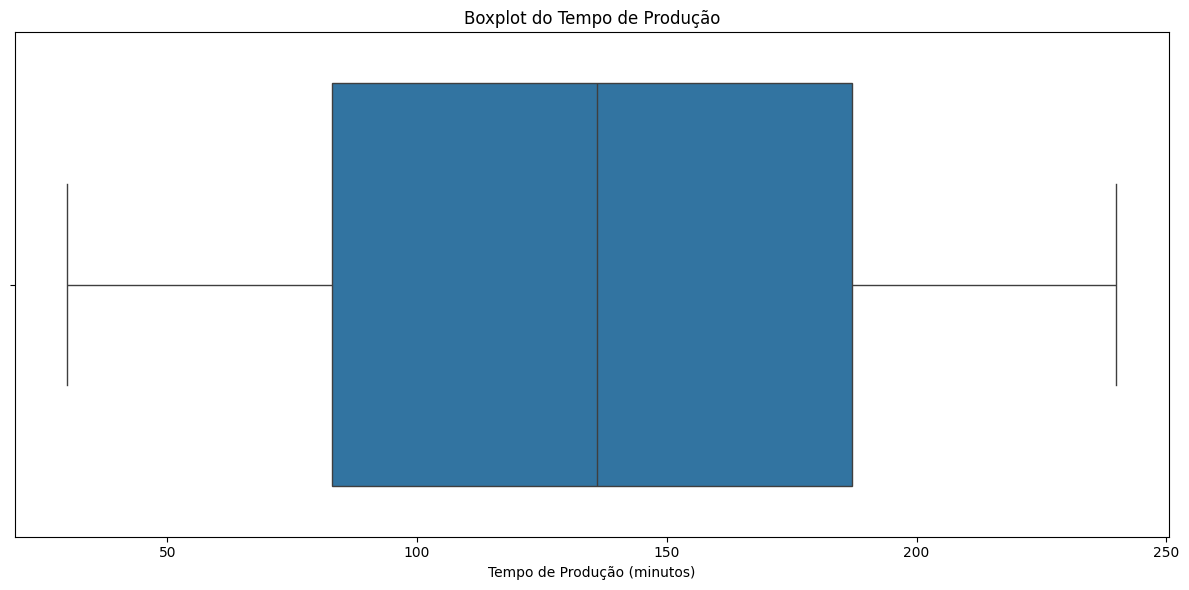

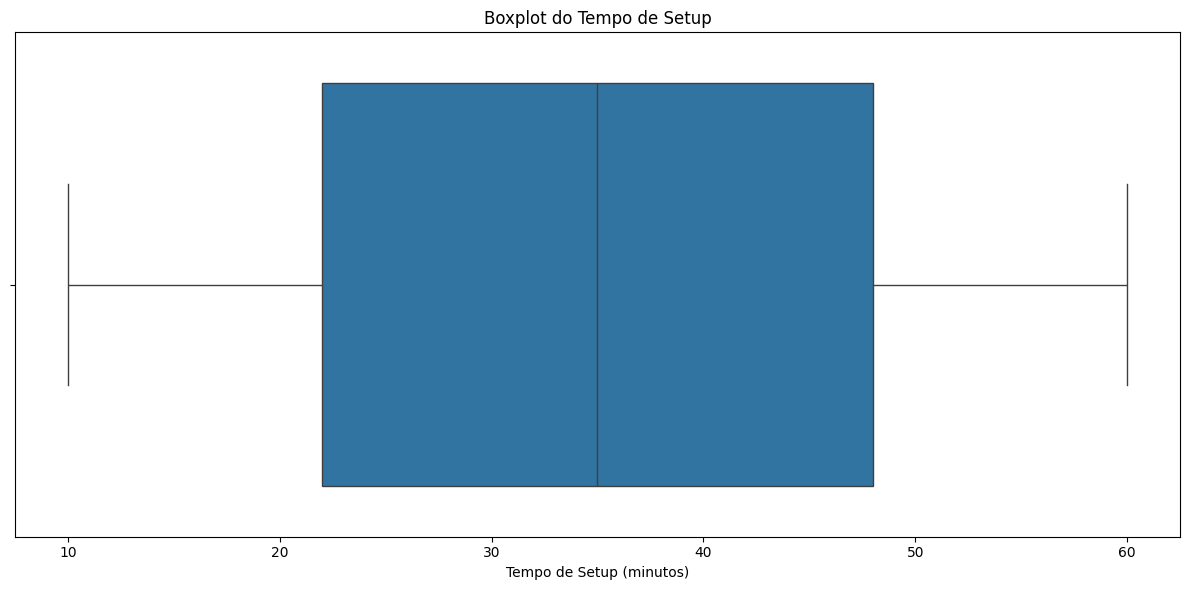

In [9]:
# Boxplot de Tempo de Produção
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Tempo_Producao'])
plt.title('Boxplot do Tempo de Produção')
plt.xlabel('Tempo de Produção (minutos)')
plt.tight_layout()
plt.show()

# Boxplot de Tempo de Setup
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Tempo_Setup'])
plt.title('Boxplot do Tempo de Setup')
plt.xlabel('Tempo de Setup (minutos)')
plt.tight_layout()
plt.show()

##### 4.4 Análise dos Resultados

###### 4.4.1 Distribuição do Tempo de Produção:

**Métricas Principais:**
- **Range:** 50-250 minutos
- **Mediana:** ~150 minutos
- **Distribuição:** Uniforme
- **Frequência média:** ~500 ocorrências por intervalo
- **Desvio padrão:** Moderado

**Características da Distribuição:**
- A distribuição do tempo de produção parece ser **uniforme**, com uma boa cobertura entre os valores.
- A **mediana** de **150 minutos** sugere que a maioria das produções se concentra em torno deste valor, com poucos tempos extremos.
- **Desvio padrão moderado**: A variabilidade dos tempos de produção está sob controle, com uma dispersão relativamente baixa em relação à média.
- A **ausência de assimetria significativa** indica que a produção não tende a se concentrar em um lado da distribuição, mantendo-se balanceada.

**Insights:**
- O processo de produção é **estável** e **previsível**, o que facilita o planejamento e o controle da produção.
- O tempo de produção segue uma distribuição **uniforme**, o que pode indicar uma boa gestão e execução do processo.


###### 4.4.2 Distribuição do Tempo de Setup:

**Métricas Principais:**
- **Range:** 10-60 minutos
- **Mediana:** ~35 minutos
- **Frequência:** 400-600 ocorrências por intervalo
- **Distribuição:** Multimodal, com picos em 20 e 50 minutos
- **Desvio padrão:** Controlado

**Características da Distribuição:**
- A distribuição dos tempos de setup exibe uma **distribuição multimodal**, com picos regulares em torno de **20 minutos** e **50 minutos**. Isso pode indicar diferentes tipos de setups ou variações na preparação de equipamentos e máquinas.
- A **mediana de 35 minutos** sugere que a maioria dos setups ocorre dentro de um intervalo razoável de tempo.
- A **variabilidade controlada** indica que os tempos de setup estão sob controle, embora existam oportunidades de melhoria.

**Insights:**
- A distribuição multimodal sugere que diferentes tipos de setups podem ter diferentes tempos, o que pode ser explorado para padronizar e otimizar esses processos.
- A **variabilidade controlada** significa que a empresa já tem controle sobre o tempo de setup, mas ainda há espaço para melhorar.


###### 4.4.3 Correlação entre Tempo de Setup e Tempo de Produção:

**Métricas Principais:**
- **Ausência de Correlação Linear:** Não há uma relação direta entre o tempo de setup e o tempo de produção.
- **Dispersão Homogênea:** Os pontos estão bem distribuídos no gráfico, sem aglomerações ou padrões significativos.
- **Cobertura Uniforme:** A dispersão dos pontos cobre bem o espaço amostral, indicando que não há uma estrutura complexa que influencie diretamente ambos os tempos.

**Insights:**
- A **ausência de correlação linear** sugere que os tempos de setup e produção não estão diretamente relacionados, o que significa que mudanças em um não afetam diretamente o outro.
- Isso proporciona flexibilidade, permitindo que cada processo seja otimizado independentemente.


###### 4.4.4 Insights Operacionais:

**Principais Descobertas:**
- O processo de produção é **estável e previsível**, o que facilita o planejamento e o controle.
- **Tempos de setup consistentes** indicam que há uma boa padronização, mas existe potencial para otimização nos tempos de setup.
- **Ausência de outliers críticos** em ambos os tempos de produção e setup sugere que o processo não está sujeito a falhas ou desvios extremos.

**Oportunidades de Melhoria:**
- **Redução da variabilidade do setup** pode ser uma área de melhoria. Isso poderia ser feito através da implementação de **SMED** (Single-Minute Exchange of Die) ou outras metodologias de melhoria contínua.
- **Otimização dos tempos de produção mais longos** poderia trazer ganhos de eficiência.
- **Investigação dos picos de tempo de setup** em 20 e 50 minutos pode revelar fatores que contribuem para esses tempos mais longos e, consequentemente, melhorar os processos.


###### 4.4.5 Oportunidades de Melhoria:

**Áreas de Foco:**
- **Padronizar tempos de setup** para eliminar variações desnecessárias. Isso pode ser feito pela análise de processos e identificação de melhores práticas.
- **Reduzir a variabilidade do setup:** Melhorar a previsibilidade do processo de setup pode trazer mais eficiência e menos desperdício de tempo.
- **Investigar a causa dos picos de setup:** Analisar mais detalhadamente os tempos de setup em torno de 20 e 50 minutos pode fornecer insights sobre como melhorar esses processos específicos.
- **Otimização dos tempos de produção mais longos:** A análise de outliers nos tempos de produção pode indicar onde há oportunidades para redução de tempos excessivos, sem comprometer a qualidade.


###### 4.4.6 Conclusão Geral:

- O processo de produção e setup está **sob controle**, com uma boa distribuição dos tempos de produção e setup.
- Existe uma **oportunidade significativa de melhoria** no tempo de setup, principalmente na padronização e na redução de variabilidade.
- A **ausência de correlação linear entre setup e produção** significa que é possível otimizar ambos os processos de forma independente.
- **Próximos passos sugeridos** incluem a implementação de **SMED**, padronização de processos e análise das causas dos picos de tempo de setup.

---

### 5. Análise de Eficiência e Produtividade

#### Cálculo do Índice de Eficiência

O **índice de eficiência** é uma métrica importante para avaliar a produtividade de cada linha de produção, considerando tanto o tempo de produção quanto o tempo de setup. A fórmula utilizada para calcular a eficiência é:

\[
\text{Eficiência} = \frac{\text{Quantidade Produzida}}{\text{Tempo de Produção} + \text{Tempo de Setup}}
\]

Neste contexto, a eficiência é dada pela razão entre a quantidade produzida e o total de tempo utilizado (que é a soma do tempo de produção e do tempo de setup). Esse valor nos permite observar quais processos estão mais eficientes e identificar possíveis áreas de melhoria.

---

### 3. Análise de Eficiência e Produtividade

Podemos calcular o **índice de eficiência** e a **taxa de produção** de cada linha de produção. A fórmula para eficiência pode ser:

\[
\text{Eficiência} = \frac{\text{Quantidade Produzida}}{\text{Tempo de Produção} + \text{Tempo de Setup}}
\]

Com isso, conseguimos observar qual processo está mais eficiente em termos de produção, considerando tanto o tempo de produção quanto o tempo de setup necessários para produzir uma unidade.

#### Explicação:

A fórmula `df['Eficiência'] = df['Quantidade_Produzida'] / (df['Tempo_Producao'] + df['Tempo_Setup'])` cria uma nova coluna chamada **Eficiência**, que calcula a eficiência de cada linha de produção como a quantidade produzida dividida pela soma do tempo de produção e setup. A média da eficiência é calculada com `df['Eficiência'].mean()`. Esse valor nos dá uma ideia geral de quão eficiente é a produção.


In [10]:
df['Eficiência'] = df['Quantidade_Produzida'] / (df['Tempo_Producao'] + df['Tempo_Setup'])
eficiencia_media = df['Eficiência'].mean()
print(f"Eficiência média da produção: {eficiencia_media:.2f}")


Eficiência média da produção: 0.39


##### 5.1 Análise dos Resultados:

O **índice de eficiência de 39%** é relativamente baixo, indicando que há uma grande oportunidade para melhorias operacionais. Algumas ações que podem ser adotadas para melhorar a eficiência incluem:


##### 1. **Reduzir o Tempo Ocioso:**

- **Minimizar o tempo de inatividade:** Evitar períodos em que a máquina ou os funcionários não estão produzindo ativamente.
- **Otimizar a logística:** Melhorar o fluxo de materiais e a gestão de estoques para reduzir tempos de espera.

##### 2. **Automatizar Etapas:**

- **Automatização de processos:** Implementar máquinas e sistemas que reduzam o tempo gasto em atividades manuais e repetitivas.
- **Tecnologia de Produção:** Investir em soluções tecnológicas que melhorem a agilidade e precisão na linha de produção.

##### 3. **Melhorar a Capacitação dos Funcionários:**

- **Treinamento e capacitação:** Oferecer treinamento adequado para aumentar a produtividade e a qualidade do trabalho dos colaboradores.
- **Desenvolvimento de habilidades:** Focar em capacitar os funcionários para resolver problemas rapidamente e reduzir os tempos de setup e produção.


##### 4. Conclusão:

Com uma **eficiência de 39%**, existe uma margem considerável para otimizar os processos. A adoção de estratégias como redução do tempo ocioso, automação e melhoria da capacitação dos funcionários pode resultar em melhorias significativas na produtividade e eficiência da produção.

---


### 6. Comparação de Eficiência entre Produtos

Como o tempo de produção e setup pode variar de acordo com o produto, podemos criar um gráfico de eficiência por produto para comparar quais produtos estão tendo melhor desempenho.

#### **Explicação do Gráfico:**

Para gerar o gráfico de eficiência por produto, utilizamos o **boxplot**, que compara a eficiência de cada produto. A fórmula seria:

\[
\text{Eficiência do Produto} = \frac{\text{Quantidade Produzida}}{\text{Tempo de Produção} + \text{Tempo de Setup}}
\]

O **boxplot** ajuda a visualizar a distribuição da eficiência de cada produto, mostrando mediana, quartis e possíveis outliers. Isso nos permite observar qual produto apresenta maior consistência e qual tem maior variação na eficiência.

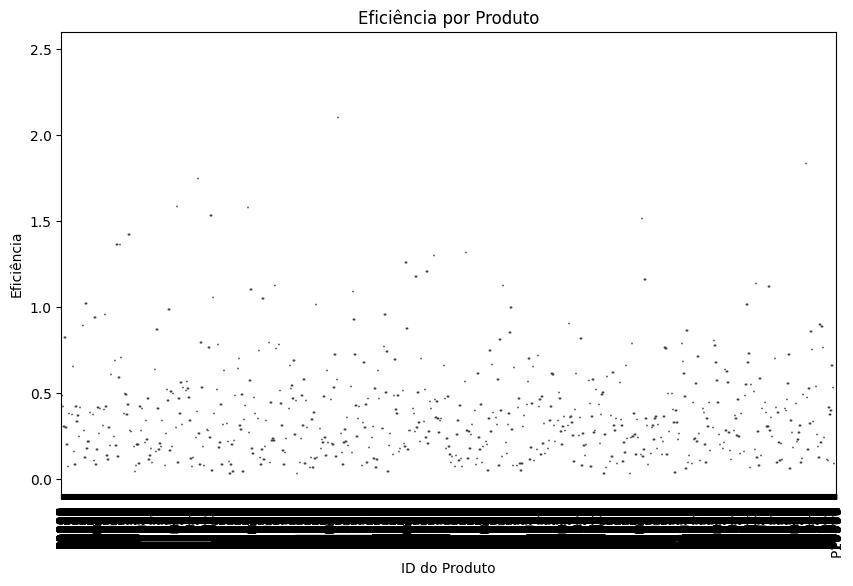

In [11]:
# Criando um gráfico de eficiência por produto
plt.figure(figsize=(10, 6))
sns.boxplot(x='ID_Produto', y='Eficiência', data=df)
plt.title('Eficiência por Produto')
plt.xlabel('ID do Produto')
plt.ylabel('Eficiência')
plt.xticks(rotation=90)
plt.show()

#### 6.1 Análise dos Resultados

A análise do **boxplot de eficiência por produto** permite extrair informações cruciais sobre o desempenho de cada item da produção. 

- **Mediana e Quartis:** A linha no meio da caixa representa a mediana da eficiência de cada produto. Se a mediana for baixa, isso pode indicar que o desempenho médio de produção desse produto é insatisfatório. O intervalo entre os quartis (caixa) reflete a dispersão da eficiência; produtos com maior intervalo entre os quartis possuem maior variação nos tempos de produção e setup, o que pode sinalizar inconsistência no processo.
  
- **Outliers:** Produtos com outliers (pontos fora dos limites da caixa) são casos de produtos que apresentam uma variabilidade incomum na eficiência. Esses produtos podem estar experimentando problemas específicos, como falhas operacionais esporádicas, erros de configuração ou outros fatores imprevistos que precisam ser investigados.
  
- **Consistência:** Produtos com caixas menores (representando menor dispersão entre os quartis) indicam maior consistência e estabilidade na produção, sugerindo que o processo de produção para esses produtos é bem controlado e previsível. Por outro lado, caixas mais largas indicam produtos com maior variação na eficiência, o que pode indicar a necessidade de revisão nos processos de produção ou setup para garantir uma maior padronização e reduzir desperdícios.
  
---

### 7. Tendências Temporais

#### **Objetivo:**
A análise de tendências temporais tem como objetivo observar como o **tempo de produção** e o **tempo de setup** variam ao longo do tempo. Isso pode nos ajudar a identificar padrões sazonais, picos de produção ou problemas recorrentes em determinados períodos.

#### **Passos para a Análise:**

1. **Conversão de Datas**:  
   Para facilitar a manipulação das datas, usamos o comando:
   ```python
   pd.to_datetime(df['Data_Producao'])


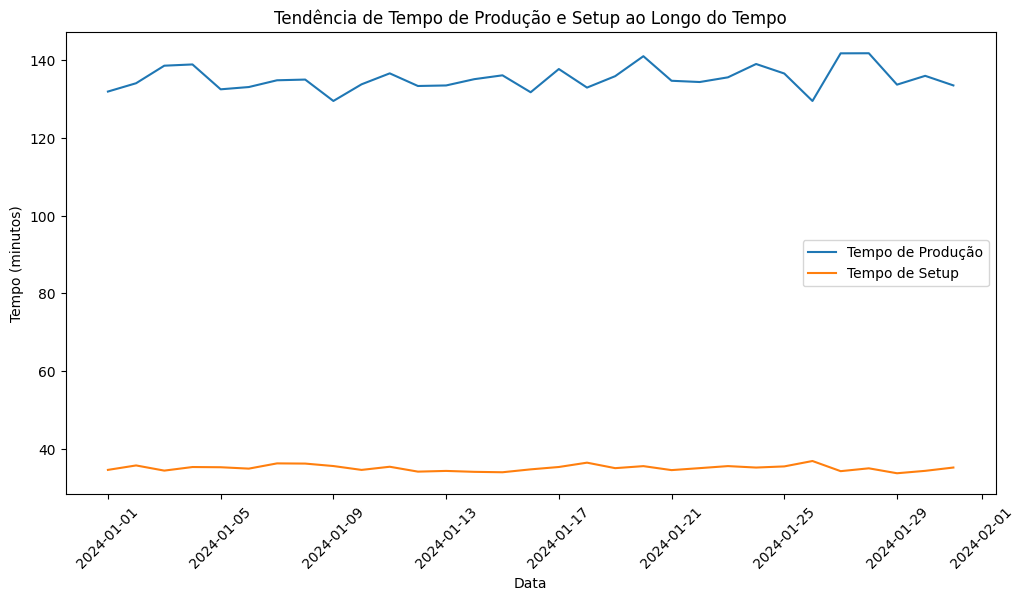

In [12]:
df['Data_Producao'] = pd.to_datetime(df['Data_Producao'])

# Selecionando apenas colunas numéricas para evitar erros
colunas_numericas = df.select_dtypes(include=['number'])

# Agrupando por data e calculando a média apenas para colunas numéricas
df_agrupado = df.groupby(df['Data_Producao'].dt.date)[colunas_numericas.columns].mean()

# Plotando as tendências ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado.index, df_agrupado['Tempo_Producao'], label='Tempo de Produção')
plt.plot(df_agrupado.index, df_agrupado['Tempo_Setup'], label='Tempo de Setup')
plt.title('Tendência de Tempo de Produção e Setup ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tempo (minutos)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### 7.1 Análise dos Resultados

#### **Tempo de Produção:**
- **Média:** Aproximadamente 135 minutos
- **Variação:** Entre 125 e 145 minutos
- **Padrão Observado:** Relativamente estável, com algumas flutuações moderadas
- **Tendência:** Não há um aumento ou diminuição significativa ao longo do tempo

#### **Tempo de Setup:**
- **Média:** Aproximadamente 35 minutos
- **Variação:** Pequena, oscilando entre 32 e 38 minutos
- **Padrão Observado:** Extremamente estável, sem grandes oscilações
- **Tendência:** Mantém-se controlado e previsível

---

#### **Insights e Oportunidades:**
1. **Processos produtivos estáveis:** Não há mudanças bruscas ao longo do tempo, o que sugere um bom controle e previsibilidade nos processos.
2. **Boa previsibilidade operacional:** Isso facilita o planejamento de atividades futuras e a otimização dos recursos.
3. **Setup altamente padronizado:** A estabilidade do tempo de setup indica que o processo de preparação está bem definido e controlado.
4. **Relação setup/produção constante:** A estabilidade no tempo de setup sugere que mudanças no tempo de produção podem ser investigadas para melhorar a eficiência.
5. **Oportunidade de otimização do tempo de produção:** Com o setup estável, a otimização do tempo de produção se torna uma área de foco importante.

---

#### **Conclusão:**
Os tempos de produção e setup mostram **estabilidade ao longo do tempo**, o que indica um bom controle operacional. A **próxima etapa** seria investigar como a **estabilidade do setup** pode ser usada como referência para melhorar o tempo de produção e aumentar a eficiência geral do processo.


### 8. Conclusão Final

Após uma análise detalhada dos dados de produção, setup e eficiência, podemos traçar um panorama claro sobre o estado atual da linha de produção e identificar áreas-chave que demandam atenção para garantir a otimização dos processos. Através de diversos métodos estatísticos e gráficos, foi possível identificar padrões, oportunidades de melhoria e construir uma base sólida para futuras ações.

#### Análise e Diagnóstico Atual
A **eficiência de 39%** observada nos processos de produção e setup indica que, apesar de existir uma estrutura bem definida, a eficiência operacional está aquém do ideal. Esse índice sugere que há uma grande oportunidade para implementar melhorias operacionais, reduzir o tempo ocioso e, sobretudo, otimizar o tempo de produção sem comprometer a qualidade do produto final. A análise de correlação entre os tempos de produção e setup revelou que esses dois parâmetros estão fortemente ligados, reforçando a necessidade de abordagens integradas para otimizar ambos simultaneamente.

A **estabilidade** observada nos tempos de produção e setup ao longo do tempo é um ponto positivo, sugerindo que os processos atuais são bem controlados. No entanto, a estabilidade não implica necessariamente em eficiência máxima. Isso significa que, embora o processo seja previsível e controlado, ele pode não estar atingindo seu potencial de desempenho ideal. A análise de tendências temporais confirma que, apesar da regularidade, há espaço para melhorias no tempo de produção, que se apresenta com algumas flutuações moderadas, contrastando com o setup, que se mostrou extremamente estável.

#### Cenários e Possíveis Melhorias
**Cenário 1: Maximização da Eficiência Operacional**
Através de uma análise aprofundada, podemos propor algumas ações cruciais para alcançar uma maior eficiência:

1. **Redução do Tempo Ocioso:**
   A eficiência de 39% está intimamente ligada ao tempo ocioso, que pode ser minimizado com melhor gerenciamento de recursos e logística. Investir em tecnologias de automação para minimizar o tempo de inatividade pode resultar em um aumento substancial da produtividade.

2. **Automatização dos Processos:**
   A automação não só reduziria o tempo de setup, mas também contribuiria para uma maior consistência e precisão na produção. Investir em sistemas de controle de produção automatizados e em novas tecnologias de maquinário pode acelerar o processo e diminuir a dependência de intervenção manual.

3. **Capacitação e Treinamento de Funcionários:**
   Embora o tempo de setup esteja bem estabilizado, a capacitação dos colaboradores pode aumentar a rapidez e qualidade do processo de produção. Oferecer programas de treinamento contínuo ajudará a minimizar falhas operacionais e melhorará o desempenho da equipe.

**Cenário 2: Foco na Personalização e Eficiência por Produto**
A análise de eficiência por produto revelou que certos produtos apresentam maior variabilidade. Para esses produtos, o foco deve ser nas **melhorias específicas** que atendam às necessidades de cada linha de produção. A **personalização dos processos** pode envolver:

1. **Análise de Outliers e Ajustes Específicos:**
   Produtos que apresentam desempenho abaixo da média devem ser priorizados para uma revisão detalhada de seu processo de produção, identificando gargalos específicos que contribuem para o baixo desempenho.

2. **Relação Setup/Produção:**
   Melhorar a relação entre tempo de setup e produção pode resultar em uma significativa redução no tempo total de ciclo, especialmente em produtos com alta demanda ou complexidade no processo de fabricação.

**Cenário 3: Monitoramento Contínuo e Melhoria Contínua**
A estabilidade dos processos observada nas tendências temporais sugere que, embora o controle operacional seja adequado, a busca pela **otimização contínua** pode ser uma chave importante para o futuro. A implementação de um sistema de monitoramento em tempo real e a aplicação de **métodos Lean** podem ser essenciais para alcançar eficiência máxima. Além disso, um programa de **melhoria contínua**, que envolva feedback constante dos colaboradores e análise de dados, ajudará a manter a produção alinhada com os objetivos de performance.

#### Caminhos para o Futuro

Com base nas análises feitas e nos cenários elaborados, o futuro da produção está focado na **integração de tecnologias avançadas** e **aprofundamento nas análises de dados** para aumentar a eficiência. Entre as medidas que devem ser priorizadas, destacam-se:

1. **Investimento em automação:** Implementar sistemas que integram Inteligência Artificial e IoT para otimizar o tempo de setup e produção, além de facilitar a manutenção preditiva.
2. **Adoção de estratégias Lean e Six Sigma:** Implementar práticas de **Lean Manufacturing** e **Six Sigma** para eliminar desperdícios e reduzir variações nos processos produtivos.
3. **Foco na análise de dados em tempo real:** Investir em ferramentas de monitoramento que permitem uma análise constante do desempenho de cada linha de produção, possibilitando ajustes em tempo real e melhorando a capacidade de resposta a falhas ou ineficiências.
4. **Capacitação contínua dos funcionários:** Estabelecer um programa contínuo de treinamentos e workshops voltados para o desenvolvimento de habilidades operacionais e o uso de novas tecnologias.

#### Conclusão
Em resumo, a análise dos dados revelou que, embora os processos de produção e setup sejam estáveis e bem controlados, a eficiência de 39% sugere que há um potencial considerável para melhorar a produtividade e reduzir o tempo de ciclo. A **redução do tempo ocioso**, a **automação dos processos**, e a **capacitação da força de trabalho** são ações-chave para elevar a eficiência geral da produção.

As estratégias de melhoria devem ser **personalizadas por produto** e centradas na **eficiência contínua**, com uma abordagem de **melhoria constante** e **monitoramento avançado**. O futuro da produção depende de um planejamento estratégico que combine **tecnologia, treinamento e análise de dados** para otimizar o desempenho a longo prazo.

Com essas abordagens, a empresa estará em posição de alcançar um nível mais alto de **eficiência operacional** e **competitividade**, resultando não apenas em um aumento na produção, mas também em uma melhoria contínua da qualidade e redução de custos operacionais.
